## Exercise 6a

Create box plots on a single set of axes for all five experiments in the morley data set.

[Wiki](https://en.wikipedia.org/wiki/Box_plot) [G4G](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/) [Matplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [129]:
mor = pd.DataFrame(pd.read_csv('morley.csv'))
# mor

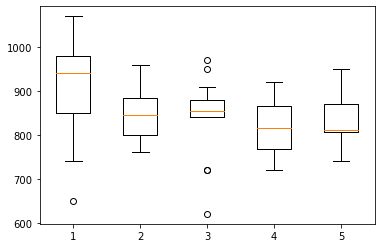

In [126]:
# create datasets for each experiment number. I found the code for filtering DataFrames on the GeeksForGeeks 
# page in the README, and the loop to create variables in the StackOverflow link.
spds = {}

# look through numbers 1 to 5, and create a seperate dictionary item for 
for i in range(1, 6):
    spds[i] = mor[mor['Expt'] == i]['Speed']
    # print(e[i])

# code adapted from Ian's tutorial
plt.boxplot(np.array([spds[1],spds[2],spds[3],spds[4],spds[5]]).T)
plt.show()

## Exercise 6b

Create box plots for all of the numerical variables in Fisher's Iris data set.

PL: 1.0 to 6.9 PW: 0.1 to 2.5 SL: 4.3 to 7.9 SW: 2.0 to 4.4


C:\Users\stuar\AppData\Local\Temp\ipykernel_20640\98324372.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['petal length', 'petal width','sepal length', 'sepal width'])


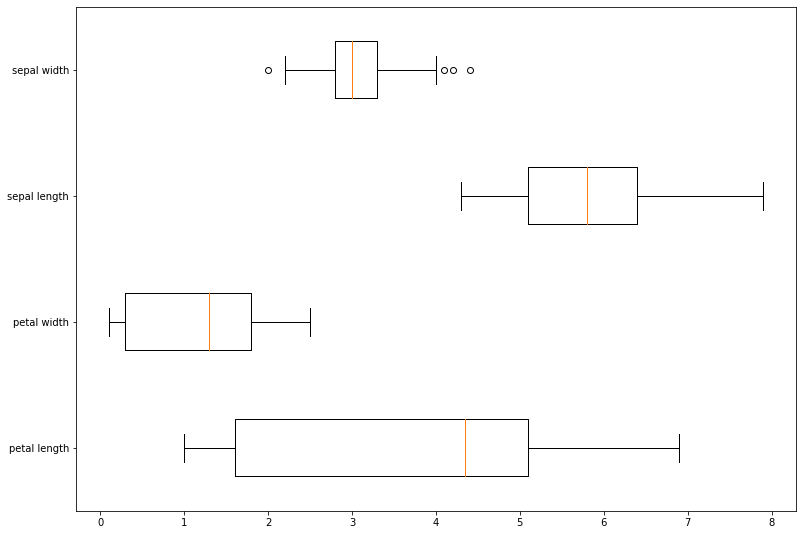

In [131]:
# following the GeeksForGeeks tutorial linked in the README
iris = pd.DataFrame(pd.read_csv('iris.csv'))
# separate each column into a list
pl = iris['petal_length']
pw = iris['petal_width']
sl = iris['sepal_length']
sw = iris['sepal_width']

data = [pl,pw,sl,sw]

# creates a larger display area
fig = plt.figure(figsize=(10, 7))

# a new axis for custom labels
ax = fig.add_axes([0,0,1,1])
ax.set_yticklabels(['petal length', 'petal width','sepal length', 'sepal width'])

# vert parameter turns the plot on its side
ax.boxplot(data, vert=0);
# testing just to make sure the correct label is attached to the correct plot
print(
    "PL:", pl.min(), "to", pl.max(), 
    "PW:", pw.min(), "to", pw.max(), 
    "SL:", sl.min(), "to", sl.max(), 
    "SW:", sw.min(), "to", sw.max())

## Exercise 6c

Adapt the above code and plots so that the overall plot is inversely propertional and the individual groups are directly proportional.

SS - in the discussion forum somebody asked about this, the "above code" actually refers to the plot above it in the original notebook, rather than the iris or morley datasets. Code below is what is being referenced, basically you need to get the individual ranges going from bottom-left to top-right, but the overall trend going from top-left to bottom-right, the exact opposite of what is currently happening.

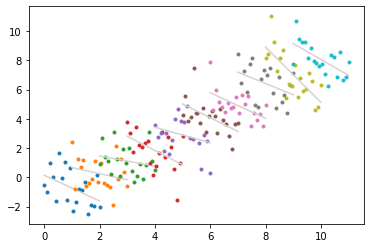

In [133]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])
# Create a corresponding series of y vectors.
ys = np.array([-1.0 * xs[i] + 2 * i for i in range(len(xs))])
# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

# Add some noise.
ys = ys + np.random.normal(0.0, 1.0, ys.shape)

# Create a steadily increasing x range for plotting.
xbestfit = np.linspace(x.min(), x.max(), 1000)
# Create corresponding y values form best fit line.
ybestfit = m * xbestfit + c

# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');